# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [35]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
from matplotlib import cm

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.morphology import disk
from skimage.morphology import erosion
from skimage.morphology import dilation
from skimage.morphology import opening
from skimage.morphology import closing
from skimage import filters

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

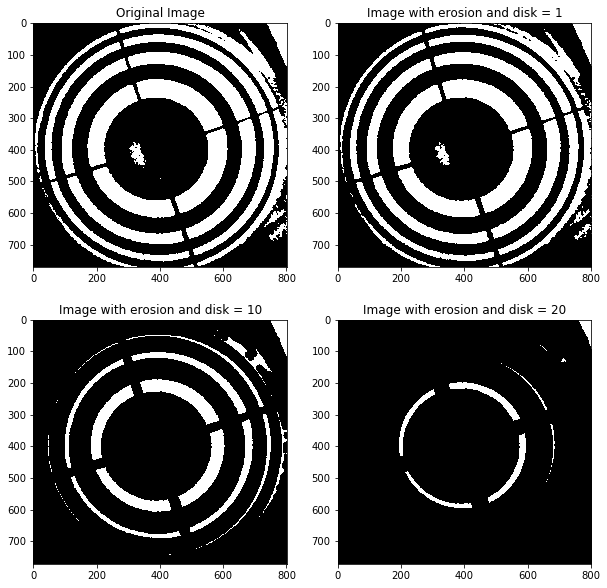

In [18]:
#Loading Image
img_path ="./images/FindingContours.png"
Contour = io.imread(img_path)

#Definging Disk
d=1;
d1=10;
d2=20;

#Applying Erosion
Contour1 = erosion(Contour,disk(d));
Contour2 = erosion(Contour,disk(d1))
Contour3 = erosion(Contour,disk(d2));

#Plotting the images
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(Contour, cmap=cm.gray)
ax0.set_title('Original Image')
ax1.imshow(Contour1, cmap=cm.gray)
ax1.set_title('Image with erosion and disk = 1')
ax2.imshow(Contour2, cmap=cm.gray)
ax2.set_title('Image with erosion and disk = 10')
ax3.imshow(Contour3, cmap=cm.gray)
ax3.set_title('Image with erosion and disk = 20')



** Q.1.2 Dilation **

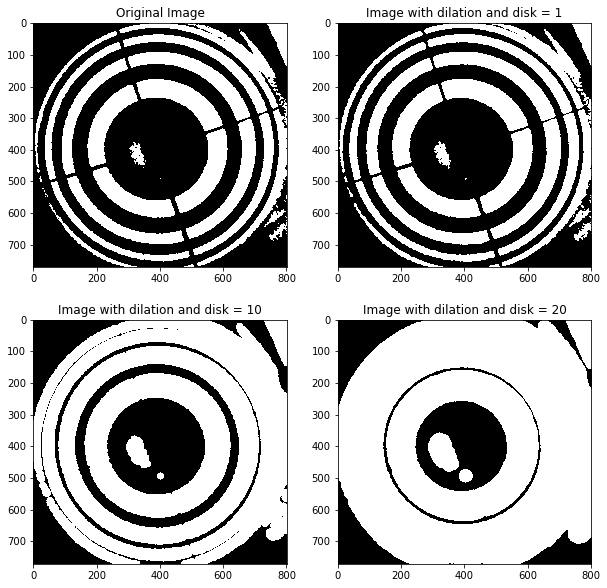

In [19]:
#Using Same image from other part and apply Dilation
#Applying Dilation
ContourD = dilation(Contour,disk(d));
ContourD1 = dilation(Contour,disk(d1))
ContourD2= dilation(Contour,disk(d2));

#Plotting the images
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(Contour, cmap=cm.gray)
ax0.set_title('Original Image')
ax1.imshow(ContourD, cmap=cm.gray)
ax1.set_title('Image with dilation and disk = 1')
ax2.imshow(ContourD1, cmap=cm.gray)
ax2.set_title('Image with dilation and disk = 10')
ax3.imshow(ContourD2, cmap=cm.gray)
ax3.set_title('Image with dilation and disk = 20')




** Q.1.3 Opening **

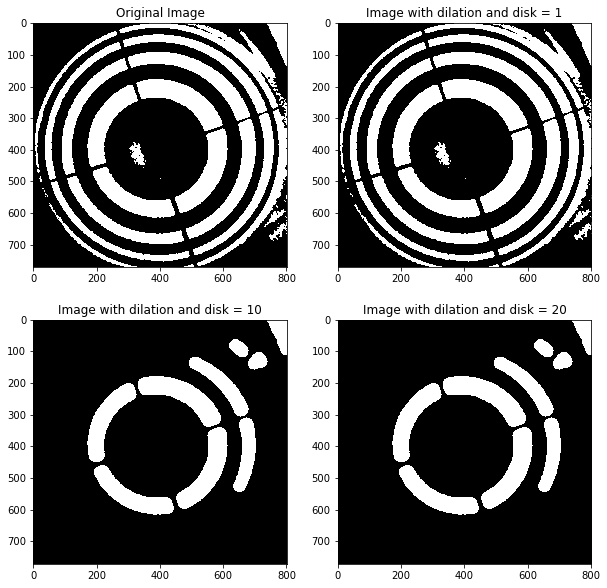

In [22]:
#Using Same image from other part and apply Dilation
#Applying Opening
ContourO = opening(Contour,disk(d));
ContourO1= opening(Contour,disk(d2));
ContourO2= opening(Contour,disk(d2));

#Plotting the images
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(Contour, cmap=cm.gray)
ax0.set_title('Original Image')
ax1.imshow(ContourO, cmap=cm.gray)
ax1.set_title('Image with dilation and disk = 1')
ax2.imshow(ContourO1, cmap=cm.gray)
ax2.set_title('Image with dilation and disk = 10')
ax3.imshow(ContourO2, cmap=cm.gray)
ax3.set_title('Image with dilation and disk = 20')




** Q.1.4 Closing**

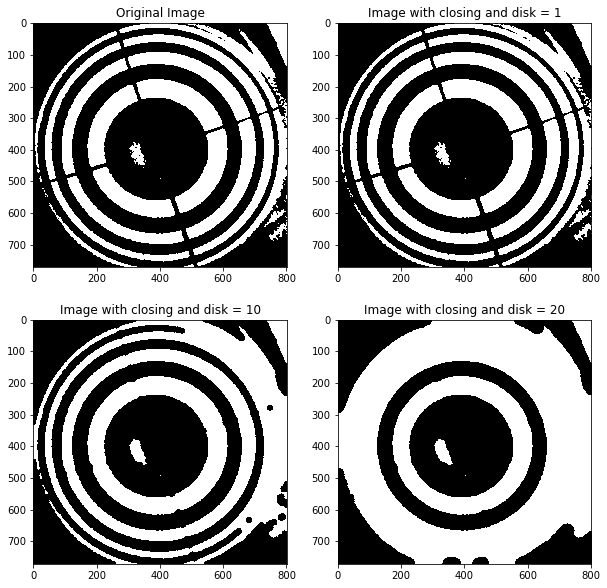

In [70]:
#Using Same image from other part and apply Dilation
#Applying Closing
ContourC = closing(Contour,disk(d));
ContourC1= closing(Contour,disk(d1));
ContourC2= closing(Contour,disk(d2));

#Plotting the images
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(Contour, cmap=cm.gray)
ax0.set_title('Original Image')
ax1.imshow(ContourC, cmap=cm.gray)
ax1.set_title('Image with closing and disk = 1')
ax2.imshow(ContourC1, cmap=cm.gray)
ax2.set_title('Image with closing and disk = 10')
ax3.imshow(ContourC2, cmap=cm.gray)
ax3.set_title('Image with closing and disk = 20')


** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/opt/anaconda/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


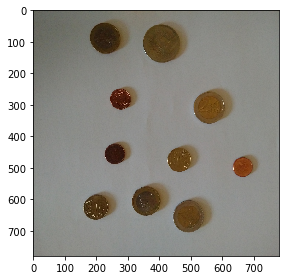

In [28]:
#Loading Image
img_path ="./images/coins.jpg"
coins = io.imread(img_path)
coins = rescale(coins, .25)
io.imshow(coins)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

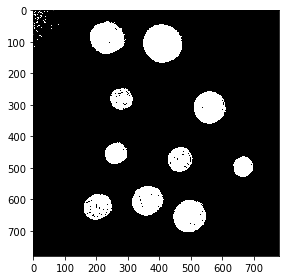

In [38]:
#Comverting the image to grey scale
coins_grey = rgb2gray(coins)

#Applying Otsu's threshoding
thresh = filters.threshold_otsu(coins_grey)
ostuthres = coins_grey <= thresh

#Showing image
io.imshow(ostuthres)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

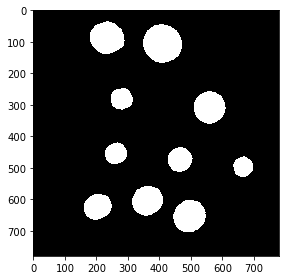

In [66]:
#Cleaning the threshold image Using Opening And Opening
ostuthresO = opening(ostuthres,disk(1));
ostuthresC = closing(ostuthresO,disk(10));
ostuthresC = opening(ostuthresC,disk(10));
io.imshow(ostuthresC)




**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


10
105.459695729
122.666804555
69.8137592259
101.453775088
69.2460838277
77.8336286823
63.6309810726
96.1773637219
84.8463103849
102.452851628


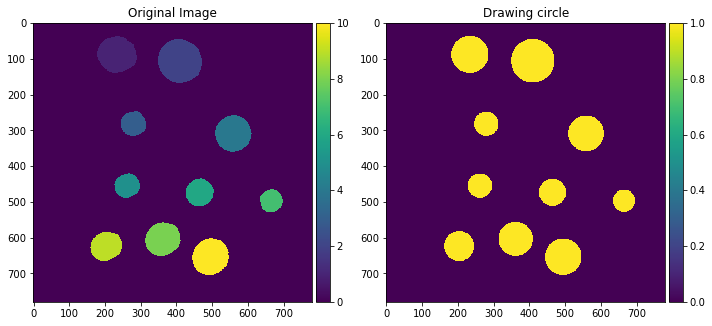

In [69]:
from skimage.measure import label
from skimage.measure import regionprops
from skimage.draw import circle

#Applying Label
coinlabel, num= label (ostuthresC, return_num=True)

#Applying RegionProps
coinregion = regionprops(coinlabel)

# mask def
mask = np.zeros_like(coinlabel)

print (num)
for region in coinregion:
    print (region.equivalent_diameter)
    r,c = region.centroid
    rr, cc = circle(int(r), int(c), int(region.equivalent_diameter/2))
    mask[rr, cc] = 1

#Plotting the images
fig = plt.figure(figsize= (10, 10))
plt.subplot(121)
plt.title('Original Image')
io.imshow(coinlabel)
plt.subplot(122)
plt.title('Drawing circle')
io.imshow(mask)



### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 